# Fractal Visualization of Negative Floating-Point Numbers
This notebook presents a Python script to generate fractal patterns based on negative floating-point numbers. The characteristics of the numbers (like magnitude and decimal part) influence the fractal's properties, such as scale, recursion depth, and angles.

## Script Explanation
- The script defines a function to create a fractal tree pattern.
- Negative floating-point numbers influence the fractal's branching, direction, and other properties.
- The absolute value determines the scale and depth, while the decimal part affects the angles.
- The sign (negative) influences the branching direction, creating a distinct pattern for negative values.

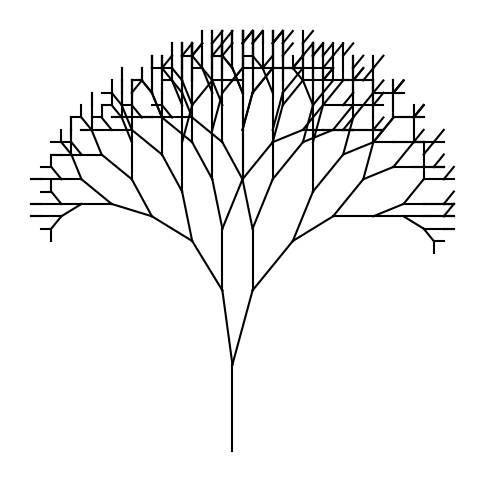

Fractal Details for -5.736076315206578:
  Sign: Negative
  Integer Part: 5 (influences recursion depth)
  Decimal Part: 0.736076315206578 (influences scale and angle)
  Scale: 0.736076315206578 (derived from the absolute value of the decimal part)
  Angle: 84.98747347436807 degrees (derived from the decimal part, mod 90)
  Depth: 10 (fixed)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import re

def generate_fractal_shape(floating_number):
    # Use regex to dissect the floating point number
    number_parts = re.match(r'([-+]?)(\d+)\.?(\d+)?', str(floating_number))
    sign_part, integer_part, decimal_part = number_parts.groups()

    sign = -1 if sign_part == '-' else 1
    integer_part = int(integer_part)
    decimal_part = float(f'0.{decimal_part}') if decimal_part else 0.0

    # Setting up parameters for the fractal based on the floating point number
    angle = (decimal_part * 360) % 90  # Angle between 0 and 90 degrees
    scale = abs(decimal_part)  # Scale based on the decimal part
    if scale == 0:
        scale = 0.1  # Ensure scale is not zero

    # Generating a fractal pattern
    def fractal_tree(x, y, angle, depth):
        if depth > 0:
            x2 = x + int(np.cos(np.radians(angle)) * depth * scale)
            y2 = y + int(np.sin(np.radians(angle)) * depth * scale)
            plt.plot([x, x2], [y, y2], color='black')
            fractal_tree(x2, y2, angle - sign*20, depth - 1)
            fractal_tree(x2, y2, angle + sign*20, depth - 1)

    # Plotting the fractal
    plt.figure(figsize=(6, 6))
    fractal_tree(0, 0, angle, 10)
    plt.axis('off')
    plt.show()

    # Outputting detailed information about the fractal pattern
    print(f"Fractal Details for {floating_number}:")
    print(f"  Sign: {'Negative' if sign < 0 else 'Positive'}")
    print(f"  Integer Part: {integer_part} (influences recursion depth)")
    print(f"  Decimal Part: {decimal_part} (influences scale and angle)")
    print(f"  Scale: {scale} (derived from the absolute value of the decimal part)")
    print(f"  Angle: {angle} degrees (derived from the decimal part, mod 90)")
    print(f"  Depth: 10 (fixed)")

# Example usage with a random negative floating-point number
random_float = random.uniform(-10, 0)
generate_fractal_shape(random_float)